In [1]:
#!pip install tabulate
from coin_game_env import CoinGameEnv
from expectimax_agent import ExpectimaxAgent
from minimax_agent import MinimaxAgent
from random_agent import RandomAgent
from play import play_vs_other_agent
from UONI import UONI
import random

In [2]:
env = CoinGameEnv(grid_size=5)
#input_agent = InputAgent()
expectimax_agent = ExpectimaxAgent(player=1, max_depth=3)
minimax_agent = MinimaxAgent(player=1, max_depth=3, a= 2.7, b=-2.25)
random_agent = RandomAgent(player=2)

In [2]:
#imports para plotear
import matplotlib.pyplot as plt
from tqdm import tqdm

Input Agents

In [55]:
#play_vs_other_agent(env, agent1=input_agent, agent2=input_agent, render=True)

Random Agents

In [56]:
play_vs_other_agent(env, agent1=RandomAgent(1), agent2=RandomAgent(2), render=True)

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     | O   | O   | O   |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     |     | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   | O   | O   | O   | O   | O   | O   |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 | O   | O   | O   | O   | O   | O   |     | O   | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 | 

1

Random Agent vs UONI (Universal Optimization Neural Interface)

In [ ]:

# Assuming ws is a list of winners
def print_graph(ws, level):
    winners = ["UONI", "OTHER"]
    win_counts = [ws.count(x) for x in [1,2]]

    plt.bar(winners, win_counts)
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

100%|██████████| 20/20 [00:00<00:00, 76.68it/s]


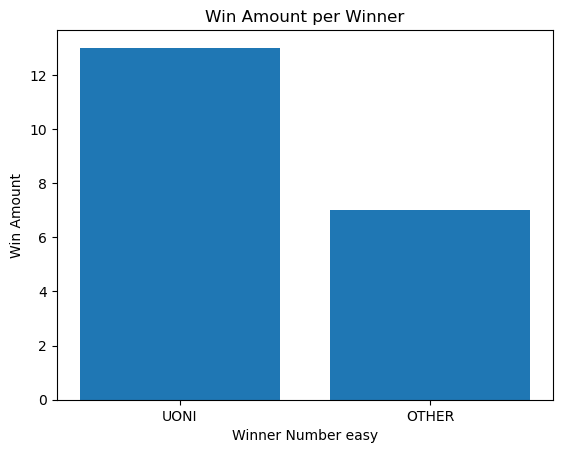

100%|██████████| 20/20 [00:00<00:00, 21.04it/s]


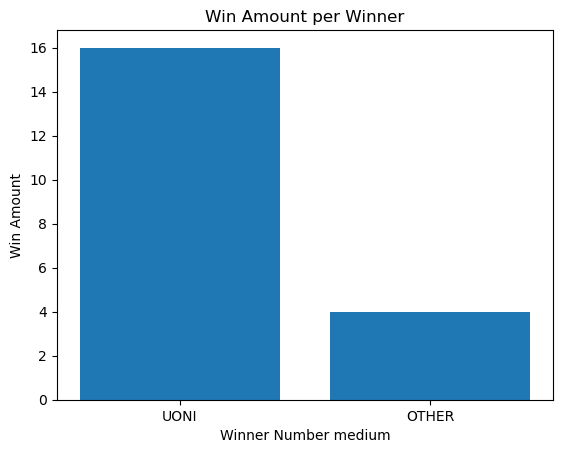

100%|██████████| 20/20 [00:01<00:00, 19.62it/s]


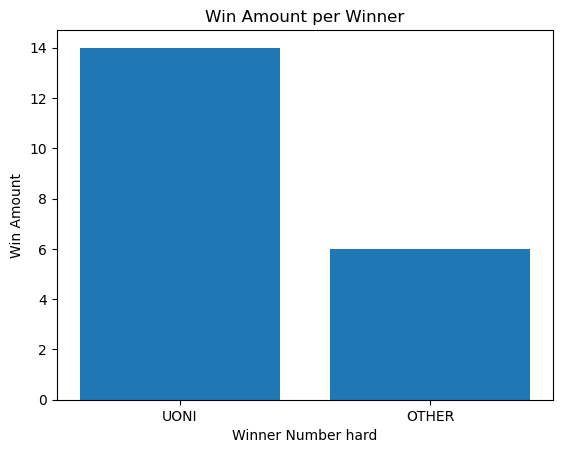

In [4]:
#este juega 20 partidas (UONI contra random)

ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=RandomAgent(2), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=RandomAgent(1), agent2=UONI(2, level), render=False))
    print_graph(ws[level], level)

In [59]:
winner = play_vs_other_agent(env, agent1=expectimax_agent, agent2=random_agent, render=True)
print(f"Winner: Player {winner}")

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     | O   | O   | O   |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     | O   | O   | O   |     | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   | O   | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 | O   | O   | O   | O   | O   | O   | O   | O   | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 | 

100%|██████████| 60/60 [04:36<00:00,  4.62s/it]


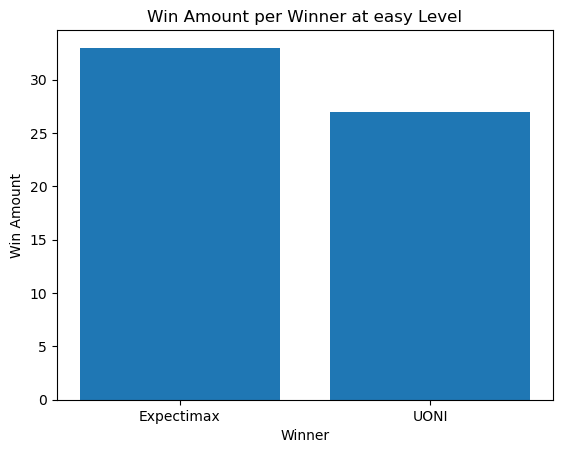

100%|██████████| 60/60 [04:27<00:00,  4.46s/it]


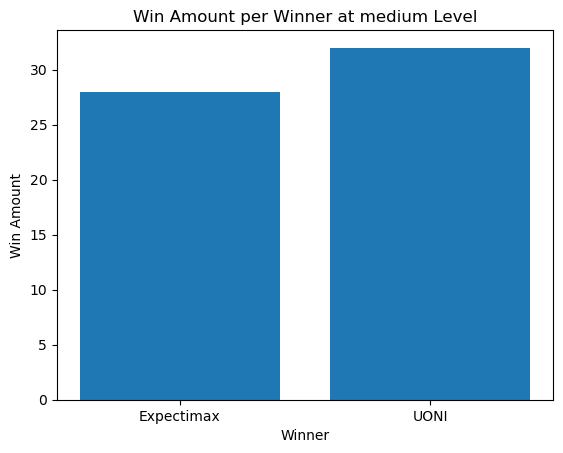

100%|██████████| 60/60 [06:13<00:00,  6.23s/it]


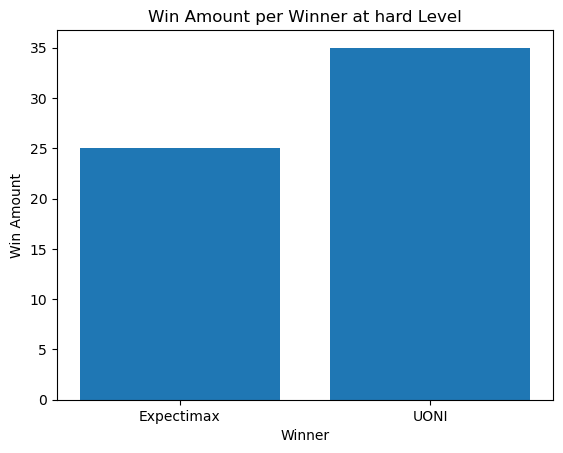

In [4]:
def print_graph(ws, level):
    winners = ["Expectimax", "UONI"]
    win_counts = [ws.count(x) for x in [1, 2]]
    
    plt.bar(winners, win_counts)
    plt.xlabel('Winner')
    plt.ylabel('Win Amount')
    plt.title(f'Win Amount per Winner at {level} Level')
    plt.show()

ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(60)):
        if i % 2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=expectimax_agent, agent2=UONI(2, level), render=False))
        else:
            ws[level].append(3 - play_vs_other_agent(env, agent1=UONI(1, level), agent2=expectimax_agent, render=False))
    print_graph(ws[level], level)

In [4]:
def print_graph(ws, level):
    winners = ["Minimax", "UONI"]
    win_counts = [ws.count(x) for x in [1, 2]]
    
    plt.bar(winners, win_counts)
    plt.xlabel('Winner')
    plt.ylabel('Win Amount')
    plt.title(f'Win Amount per Winner at {level} Level')
    plt.show()

ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i % 2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=minimax_agent, agent2=UONI(2, level), render=False))
        else:
            ws[level].append(3 - play_vs_other_agent(env, agent1=UONI(1, level), agent2=minimax_agent, render=False))
    print_graph(ws[level], level)

 20%|██        | 4/20 [00:24<01:36,  6.04s/it]


KeyboardInterrupt: 

In [3]:
import random

def play_vs_uoni(env, a, b, level='medium'):
    minimax_agent = MinimaxAgent(player=1, a=a, b=b)
    uoni_agent = UONI(2, level)
    return play_vs_other_agent(env, agent1=minimax_agent, agent2=uoni_agent, render=False)

def optimize_parameters(env, num_iterations=5, num_games=5):
    best_parameters = [(random.uniform(-3, 3), random.uniform(-3, 3)) for _ in range(5)]
    best_scores = []

    for iteration in range(num_iterations):
        scores = []
        for a, b in best_parameters:
            score = 0
            for _ in range(num_games):
                if play_vs_uoni(env, a, b) == 1:
                    score += 1
            print(f"Parameters (a={a}, b={b}), Score: {score}")
            scores.append((score, (a, b)))
        
        scores.sort(reverse=True)
        best_scores = scores[:10]
        best_parameters = [param for _, param in best_scores] + \
                          [(random.uniform(-3, 3), random.uniform(-3, 3)) for _ in range(10)]
        print(f"Best parameters so far: {best_parameters}")
    return best_scores[0]

env = CoinGameEnv(grid_size=5)
best_score, best_params = optimize_parameters(env, num_iterations=5, num_games=5)
print(f"Best Parameters: a={best_params[0]}, b={best_params[1]} with score: {best_score}")


Parameters (a=-1.1693591070672158, b=-0.24498598602764332), Score: 3
Parameters (a=-0.071050218810079, b=0.5155133166161701), Score: 2
Parameters (a=2.030091485228666, b=-0.22591647312102703), Score: 4
Parameters (a=0.6305904379710761, b=0.7827912262554202), Score: 3
Parameters (a=-0.498806411012779, b=-2.451742538286278), Score: 3
Best parameters so far: [(2.030091485228666, -0.22591647312102703), (0.6305904379710761, 0.7827912262554202), (-0.498806411012779, -2.451742538286278), (-1.1693591070672158, -0.24498598602764332), (-0.071050218810079, 0.5155133166161701), (-0.2900025907374806, 1.8926855501617084), (-1.2166203586411175, 1.1458660138267946), (1.9346583438201748, 1.6276410189868393), (-0.6196833191707842, -1.3321911822892116), (2.2815350663316663, 2.8332653888696315), (2.256048088630245, -1.417945641874451), (-0.6440419101515245, -0.7748409696282881), (-1.7219442752505607, -2.0346577945210407), (1.6270537773565774, 1.6517542704208035), (2.1246467530972826, -0.25365079883531116)